In [1]:
import networkx as nx
import pandas as pd
import UserGraph
import importlib
importlib.reload(UserGraph)
import UserGraph

In [2]:
# users = pd.read_csv('../userbase_builder/users.csv')
# ts_connection = pd.read_csv('../userbase_builder/teacher_student_connections.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../userbase_builder/users.csv'

In [157]:
ug = UserGraph.UserGraph()
ug.build_from_dataframe(users, ts_connection)

In [158]:
ug.save_to_file('graph.pkl')

In [144]:
users.iloc[0].to_dict()

{'user_id': 0,
 'is_professor': True,
 'is_student': False,
 'first_name': 'Simona',
 'last_name': 'Filip',
 'rating_avg': 4.8,
 'email': 'filip.simona16@gmail.com',
 'teaching_subject': 'Biology',
 'learning_subject': nan}

In [145]:
ug.add_user(1001, attributes = {'is_professor': True,
 'is_student': True,
 'first_name': 'Aca',
 'last_name': 'acA',
 'rating_avg_teacher': 4.8,
 'email': 'filip.simona16@gmail.com',
 'teaching_subject': 'Biology',
 'learning_subject': 'Mathematics'}
            )
ug.add_user(1002, attributes = {'is_professor': True,
 'is_student': True,
 'first_name': 'acA',
 'last_name': 'AcA',
 'rating_avg_teacher': 4.8,
 'email': 'filip.simona16@gmail.com',
 'teaching_subject': 'Mathematics',
 'learning_subject': 'Biology'}
            )

In [150]:
ug.cycles

[[16, 302],
 [16, 302, 295, 145, 431],
 [16, 302, 295, 145, 433],
 [16, 302, 295, 145, 813],
 [16, 302, 295, 315, 445],
 [16, 302, 295, 315, 544],
 [16, 302, 295, 315, 766],
 [16, 302, 295, 355],
 [16, 302, 295, 420, 431],
 [16, 302, 295, 420, 433],
 [16, 302, 295, 420, 813],
 [16, 302, 366, 27, 409],
 [16, 302, 366, 100, 431],
 [16, 302, 366, 100, 433],
 [16, 302, 366, 100, 813],
 [16, 302, 366, 636],
 [16, 302, 366, 930, 445],
 [16, 302, 366, 930, 544],
 [16, 302, 366, 930, 766],
 [16, 302, 366, 1002, 431],
 [16, 302, 366, 1002, 433],
 [16, 302, 366, 1002, 813],
 [16, 302, 428, 431],
 [16, 302, 428, 433],
 [16, 302, 428, 813],
 [16, 302, 428, 837, 427],
 [16, 302, 428, 837, 684],
 [16, 302, 428, 1001, 636],
 [16, 302, 712, 145, 431],
 [16, 302, 712, 145, 433],
 [16, 302, 712, 145, 813],
 [16, 302, 712, 315, 445],
 [16, 302, 712, 315, 544],
 [16, 302, 712, 315, 766],
 [16, 302, 712, 355],
 [16, 302, 712, 420, 431],
 [16, 302, 712, 420, 433],
 [16, 302, 712, 420, 813],
 [16, 384, 45, 3

In [146]:
ug.find_best_cycle(1002)

[1001, 1002]

In [147]:
ug.find_best_cycle(1002)

[1001, 1002]

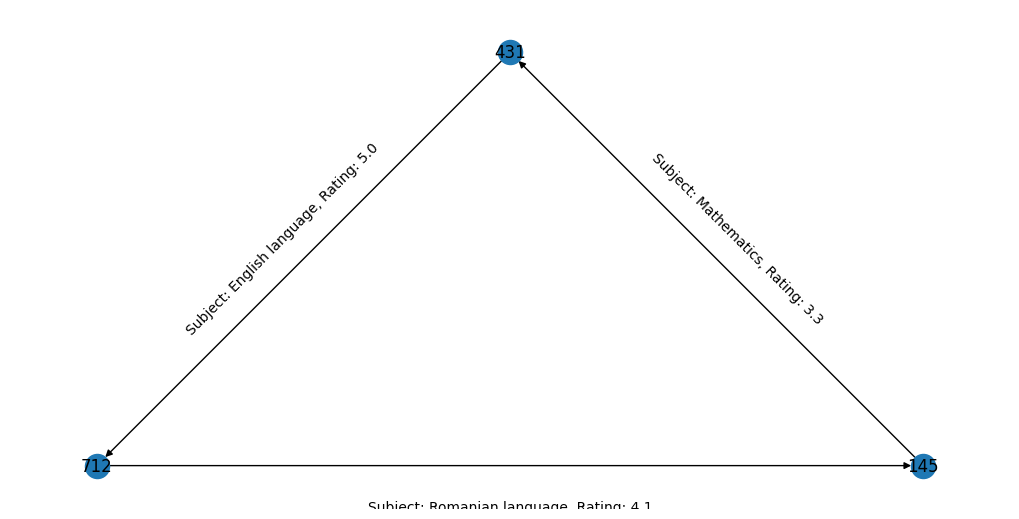

In [152]:
ug.draw_cycle(145)

In [153]:
ug.graph.get_edge_data(1001, 1002)

{0: {'subject': 'Biology', 'rating_avg_teacher': 4.8}}

In [54]:
plt.figure(figsize=(20, 10))
sG = G.subgraph(lst[0][0])
#sG = []
pos = nx.planar_layout(sG)
nx.draw(sG, with_labels = True, pos = pos)
edge_labels = {(u, v): f"Subject: {d['subject']}, Rating: {d['rating_avg_teacher']}"
               for u, v, d in sG.edges(data=True)}

nx.draw_networkx_edge_labels(sG, pos = pos, edge_labels=edge_labels,  connectionstyle = 'arc3,rad=0.1');

NameError: name 'G' is not defined

<Figure size 2000x1000 with 0 Axes>

In [154]:
nx.__version__

'3.4.2'

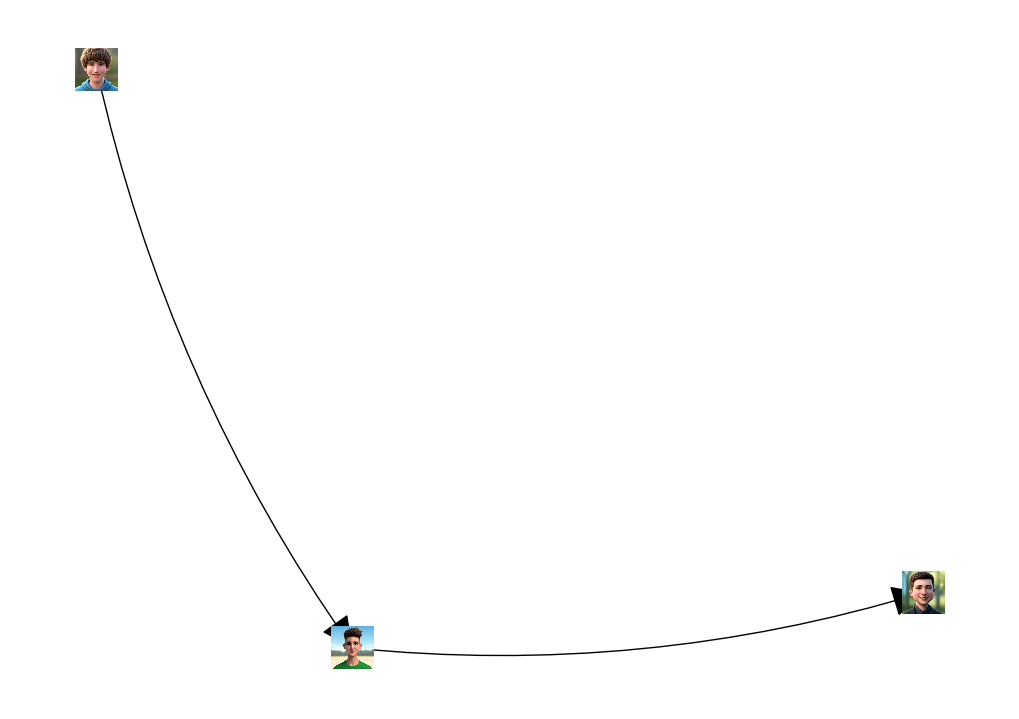

In [3]:
# SA ZAKRIVLJENIM GRANAMA

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1, 2), (2, 3)])

pos = nx.spring_layout(G)

images = {
    1: mpimg.imread('/Users/vladco/Downloads/avatari/HEIF Image 3.jpeg'),
    2: mpimg.imread('/Users/vladco/Downloads/avatari/HEIF Image 4.jpeg'),
    3: mpimg.imread('/Users/vladco/Downloads/avatari/HEIF Image 5.jpeg')
}

plt.figure(figsize=(10, 7))

nx.draw(
    G, pos, with_labels=False, node_size=0, edge_color='black',
    arrows=True, arrowsize=50, connectionstyle='arc3,rad=0.1'
)

ax = plt.gca()
for node, (x, y) in pos.items():
    img = images[node]
    imagebox = OffsetImage(img, zoom=0.03)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

plt.show()

/var/folders/07/s30sgs2s2cbf8h5g8krxzfth0000gn/T/ipykernel_41173/226835660.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  mask = mask.resize(img.size, Image.ANTIALIAS)
/var/folders/07/s30sgs2s2cbf8h5g8krxzfth0000gn/T/ipykernel_41173/226835660.py:40: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for connectionstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


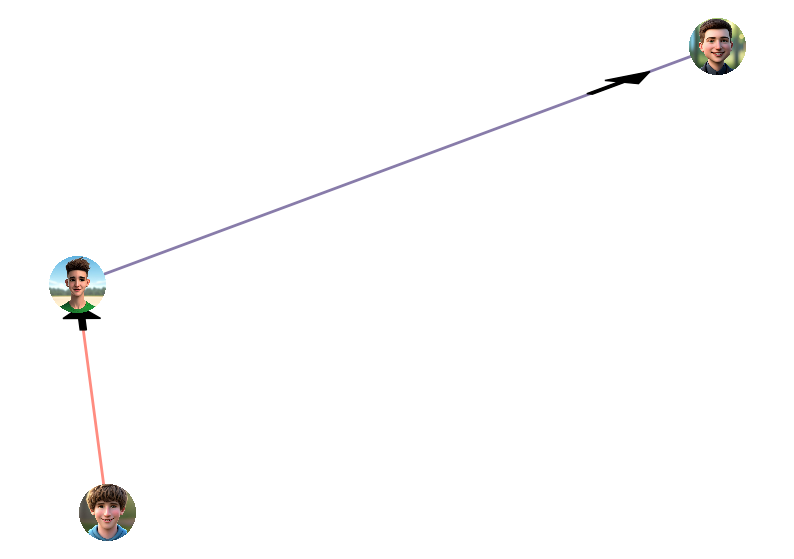

In [4]:
# OVAJ

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
from PIL import Image, ImageOps, ImageDraw
import numpy as np

def make_circular_image(image_path):
    img = Image.open(image_path).convert("RGBA")
    size = min(img.size)
    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, size, size), fill=255)
    mask = mask.resize(img.size, Image.ANTIALIAS)
    circular_img = ImageOps.fit(img, (size, size), centering=(0.5, 0.5))
    circular_img.putalpha(mask)
    return circular_img

G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1, 2), (2, 3)])

pos = nx.spring_layout(G)

images = {
    1: make_circular_image('/Users/vladco/Downloads/avatari/HEIF Image 3.jpeg'),
    2: make_circular_image('/Users/vladco/Downloads/avatari/HEIF Image 4.jpeg'),
    3: make_circular_image('/Users/vladco/Downloads/avatari/HEIF Image 5.jpeg')
}

plt.figure(figsize=(10, 7))

edge_colors = ['#FF6F61', '#6B5B95']
alpha_value = 0.8

for i, (start, end) in enumerate(G.edges()):
    nx.draw_networkx_edges(
        G, pos, edgelist=[(start, end)], arrows=False,
        connectionstyle='arc3,rad=0.3', edge_color=edge_colors[i % len(edge_colors)],
        alpha=alpha_value, width=2 
    )

ax = plt.gca()
for node, (x, y) in pos.items():
    img = np.array(images[node])
    imagebox = OffsetImage(img, zoom=0.04)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

arrow_position = 0.8

for (start, end) in G.edges():
    x_start, y_start = pos[start]
    x_end, y_end = pos[end]

    arrow_x = x_start + arrow_position * (x_end - x_start)
    arrow_y = y_start + arrow_position * (y_end - y_start)

    arrow = patches.FancyArrow(
        arrow_x, arrow_y, (x_end - x_start) * 0.05, (y_end - y_start) * 0.05,
        width=0.005, head_width=0.03, head_length=0.05, color='black'
    )
    ax.add_patch(arrow)

plt.axis('off')
plt.show()